Being trained on base classes, FGN is expected to segment from a query image all the instances belonging to novel classes, given a support set which contains only a handful of exemplars for each class.

For one reason, training data are intrinsically difficult to acquire in certain application scenarios. For another, pixel-wise instance annotations necessitated by instance segmentation are extremely expensive, compared to other tasks like recognition or detection.

Note that RoIs are judged to be background or not by thresholding the $(N+1)$-th classification score, and background RoIs will not be further processed by the bbox regression branch or the mask segmentation branch, similar to Mask R-CNN.

**Attention-Guided RPN**

To adapt to the existence of FPN, we apply AG-RPN mechanism at each pyramid level to match and refine anchors of highly diverse ratios and scales. Each class attentive vector, taken average over all vectors of the class, guide RPN to predict the anchors' matching scores with class-specific refinement. Then proposals are generated from the refinement corresponding to the best match class, and we softmax all the matching predictions as the final score. Finally, we generate 256 proposals in the same mechanism as previous R-CNN~\cite{ren2015faster, he2017mask} networks by thresholding and applying NMS on these final scores.


**Conditioned Detection and Segmentation Heads**

The similarity between query RoIs and supports is parameterized with a cascade of convolution layers and fully-connected layers applied on the concatenation of RoI and support features. Bounding box regression shares features with the classifier after the first convolution and activation. To introduce full annotation infomation into guidance, support features are masked with its segmentation annotation and pooled to extract global representation. To reduce the computation complexity, we select one support class to guide the segmentation branch, which comes from the ground truth class during training and the top predicted class during inference.

**Episode Construction**

Our model is trained under the episodic training scenario. For each episode, we first sample a query image from the train set and K support samples from one of the categories that the query contains. Then we randomly choose N-1 classes from $\mathcal{C}^{base}$ and sample supports similarly. Note that this setting assures that at least one query instance falls into the N support categories and prevents exposing to novel class annotations. To fully utilize support class representation and include some contextual information, support instances are cropped from the image it originates with 20 pixels extension around their boundaries.

While few-shot instance segmentation has been rarely addressed in previous literature, there exist a couple of methods for few-shot object detection, a closely related task. To further verify the effectiveness of our proposed method, we compare our detection performance with the existing works on both few-shot detection and instance segmentation \cite{chen2018lstd, kang2019few, michaelis2018one, yan2019metarcnn}. We set identical evaluation procedure as stated in Section ~~S~~ and apply evaluation on both PASCAL-VOC \cite{everingham2010pascal} and COCO2017 \cite{lin2014microsoft} datasets with mAP$_{50}$ as metric. We compared our results with results reported from LSTD paper \cite{chen2018lstd} under same 3-way N-shot experiment settings (referred to as \textbf{LSTD}) and results evaluated from Meta R-CNN \cite{yan2019metarcnn}, Siamese Mask R-CNN \cite{michaelis2018one} and Feature Reweighting \cite{kang2019few} (referred to as \textbf{FW-YOLO}). Results are listed as Table ~~T~~.

**Full Guidance**

One key reason of FGN's effectiveness is that we carefully design three guidance mechanisms, *i.e.* AG-RPN (P), RG-DET (D) and AG-FCN (S) to achieve full guidance. To verify the contributions of these modules, we construct several variants by disabling one or more modules from the full FGN model.

By *removing* we mean replacing the modules with the corresponding basic modules provided by the original Mask R-CNN~\cite{he2017mask} with class-agnostic ones, *i.e.* predicting a single quadlet for bbox branch of RG-DET, a single mask for AG-FCN and original RPN as \cite{he2017mask}.

The results obtained by these variants in terms of $\text{mAP}_\text{50}$ for segmentation and detection are comparatively reported in Table T. It can be seen from the degraded performance of these variants that, each module contributes to some extent on both tasks.

1) Use Attention-Guided RPN or ordinary RPN\cite{ren2015faster}. We feed proposals generated by ordinary RPN of Faster R-CNN with FPN instead of our AG-RPN proposals into the second-stage networks. Note that the proposals are separately generated without modifying our model, which excludes the influence of changing in backbone features. We refer this ablation as ***AG-RPN***

2) Conditioned detection. We replace our detection refinement branch with class agnostic refinement, i.e., the 4 refining coordinates are regressed with the aligned query features only. This branch is implemented as 2 fully-connected layers with ReLU activation in the middle. Conditioned detection is denoted as ***C-Det*** in Table Ablation.

3) Attention-Guided FCN for segmentation. We tailor our conditioning on segmentation branch and utilize query features only to predict class agnostic instance masks. This class agnostic mask is generated by feeding non-conditioned query features into identically parameterized fully convolutional layers. This ablation is denoted as \textbf{AG-FCN} in Table Ablation.

All of the ablations are evaluated under 3way-3shot COCO2VOC testing scenario on novel classes on Pascal VOC2012 valset \cite{everingham2010pascal}. Results reported as $mAP_{50}$ for both detection and segmentation are shown in Table Ablation.

AG-RPN-v1 follows the Siamese Network mechanism like ~\cite{michaelis2018one} to achieve guidance

In [2]:
import cv2
import matplotlib.pyplot as plt
def show(path, coef=1):
    img = plt.imread(path)
    h, w = img.shape[:2]
    img = cv2.resize(img, dsize=(int(w/coef), int(h/coef)))
    h, w = img.shape[:2]
    dpi = plt.rcParams['figure.dpi']
    px = 1 / dpi
    plt.figure(frameon=False, figsize=(w * px, h * px))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

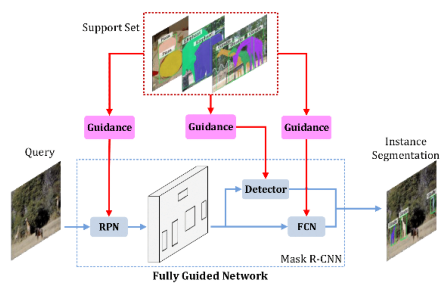

In [2]:
show('fgn_images/fsis-concept.png', coef=4)

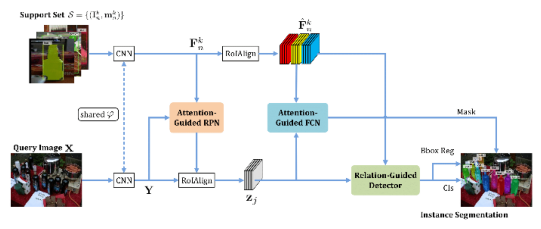

In [3]:
show('fgn_images/fgn.png', coef=4)

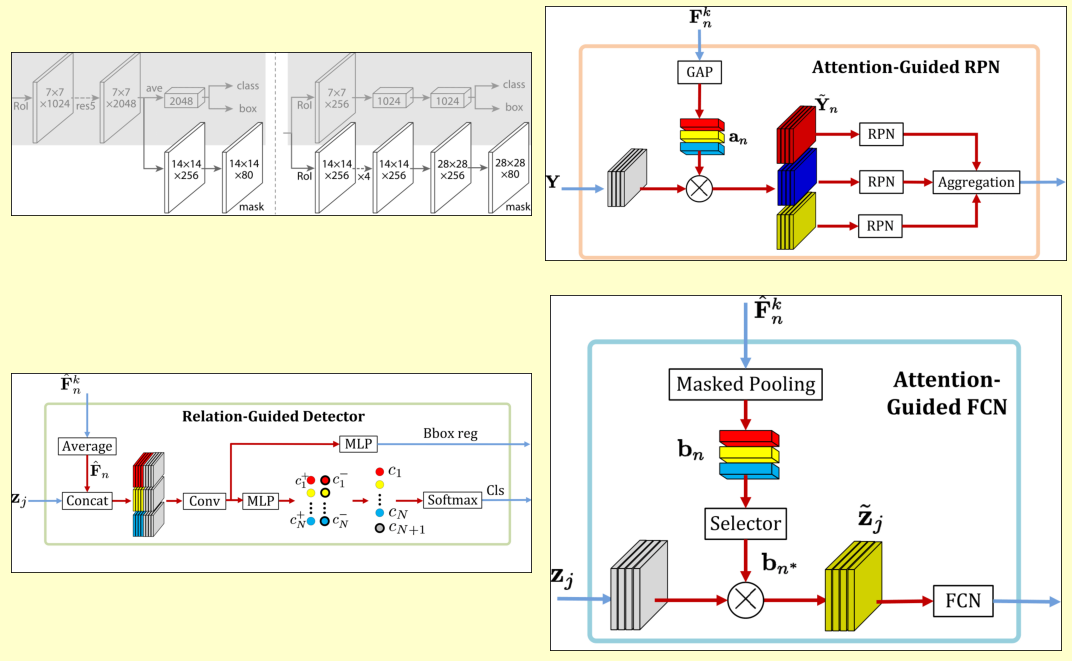

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), facecolor=(1, 1, 0.8))
for i in range(2):
    for j in range(2):
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
img0 = plt.imread('fgn_images/mrcnn_head.png')
ax[0, 0].imshow(img0)
img1 = plt.imread('fgn_images/ag-rpn.png')
ax[0, 1].imshow(img1)
img2 = plt.imread('fgn_images/rg-det.png')
ax[1, 0].imshow(img2)
img3 = plt.imread('fgn_images/ag-fcn.png')
h, w = img3.shape[:2]
ax[1, 1].imshow(img3)
plt.tight_layout()
plt.savefig('fgn_images/All.png')
plt.show()

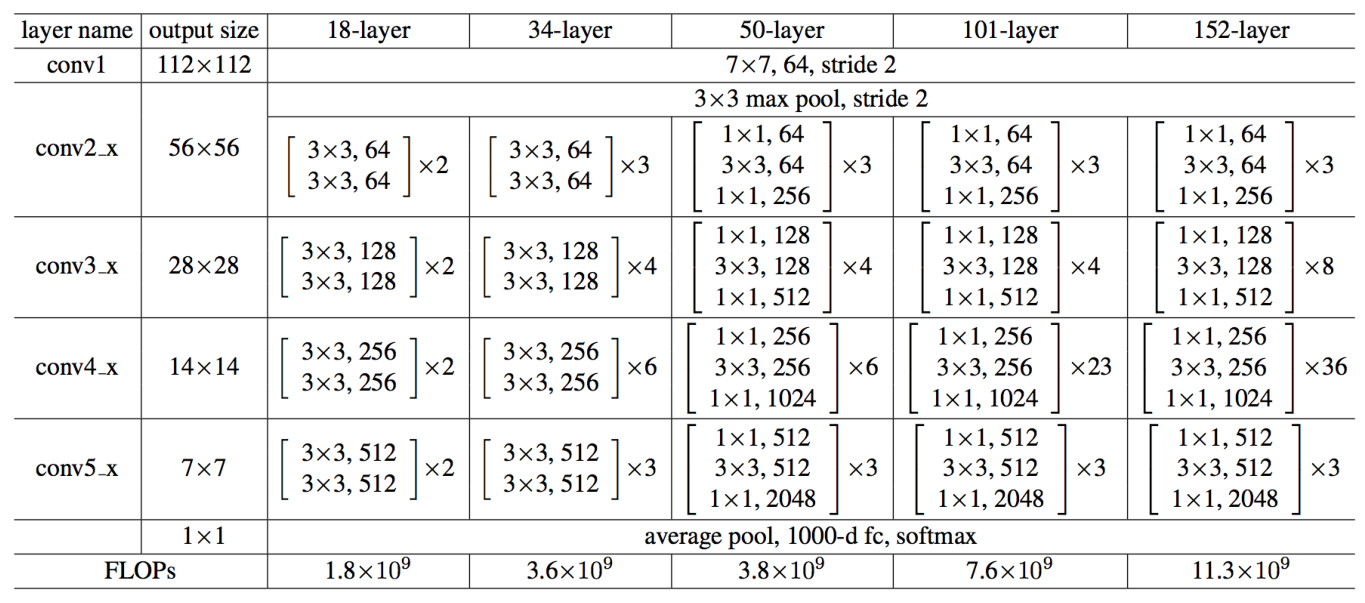

In [6]:
show('fgn_images/resnet-architectures-34-101.png', coef=1)

In [6]:
exit()